In [10]:
import os
if (len(os.getcwd().split('/'))) > 5:
    os.chdir('..')
os.getcwd()

'/home/rn7823/fl_lab/centralized_cifar_10'

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
pd.read_csv('artifacts/MNIST_LeNet5_19222241.csv')

,Round,train_losses,test_losses,accuracies,gradients
0,1,2.305313,0.002255,26.62,0.363018
1,2,2.254377,0.002206,34.18,0.426243
2,3,2.196538,0.002153,37.82,0.427551
3,4,2.174674,0.002097,40.01,0.425182
4,5,2.124216,0.002036,42.99,0.509623
...,...,...,...,...,...
4685,4686,0.008128,0.000068,97.96,0.302426
4686,4687,0.048475,0.000067,97.97,0.458378
4687,4688,0.000499,0.000065,97.97,0.008567
4688,4689,0.156318,0.000065,98.00,0.233375


In [13]:
dfs = {
    'No GA' : pd.read_csv('artifacts/MNIST_LeNet5_19222241.csv'),
    'q=1' : pd.read_csv('artifacts/MNIST_LeNet5_19223665.csv'),
    'q=4' : pd.read_csv('artifacts/MNIST_LeNet5_19223675.csv'),
    'q=5' : pd.read_csv('artifacts/MNIST_LeNet5_19223663.csv'),
    'q=10' : pd.read_csv('artifacts/MNIST_LeNet5_19235623.csv')
}

In [15]:
df = pd.DataFrame(dfs['No GA']['Round'])
for x in dfs.keys():
    col = str(x)
    df[col] = dfs[x]['accuracies']
df.head()

,Round,No GA,q=1,q=4,q=5,q=10
0,1,26.62,10.11,10.46,10.98,11.49
1,2,34.18,10.17,11.18,11.11,33.86
2,3,37.82,10.19,12.10,11.55,44.93
3,4,40.01,10.26,13.43,12.00,49.59
4,5,42.99,10.76,14.91,12.52,52.80


In [16]:
df.dropna(inplace=True)

In [17]:
df.tail()

,Round,No GA,q=1,q=4,q=5,q=10
1402,1403,98.08,97.39,97.35,97.65,98.08
1403,1404,98.04,97.43,97.36,97.66,98.11
1404,1405,98.04,97.46,97.37,97.66,98.11
1405,1406,98.10,97.47,97.41,97.63,98.09
1406,1407,98.07,97.46,97.47,97.63,98.06


In [18]:
df_melted = df.melt(id_vars='Round', var_name='Method', value_name='Value')
df_melted.head()

,Round,Method,Value
0,1,No GA,26.62
1,2,No GA,34.18
2,3,No GA,37.82
3,4,No GA,40.01
4,5,No GA,42.99


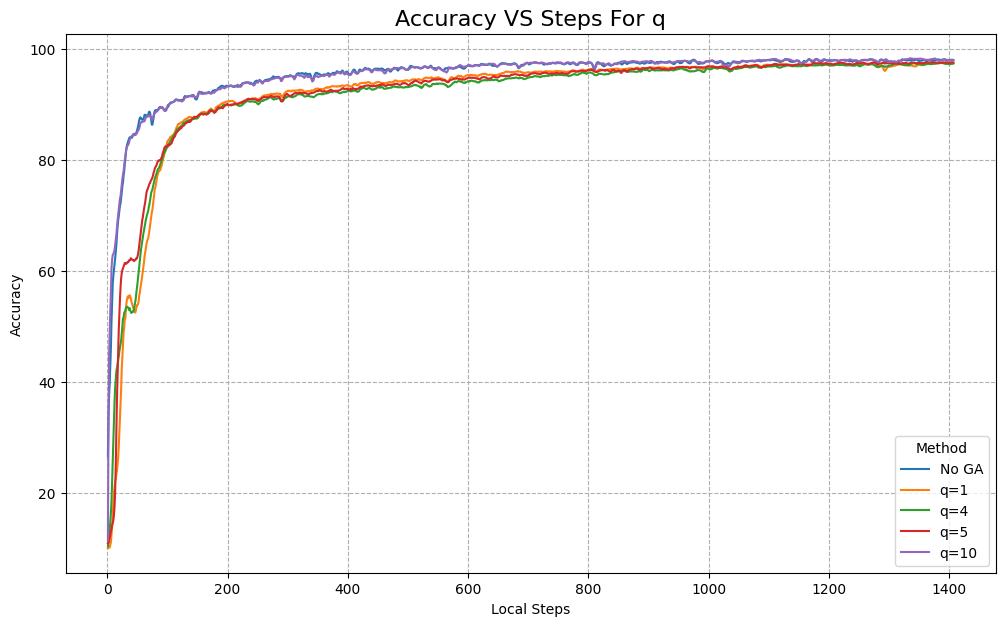

In [19]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_melted, x='Round', 
             y='Value', 
             hue='Method', 
            #  marker='o'
             )

plt.title('Accuracy VS Steps For q', fontsize=16)
plt.xlabel('Local Steps')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--')

plt.show()